In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('../datasets/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df_cols = df.columns
df_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
Indexes = []
for a in df_cols:
    per_75, per_25 = df[a].quantile(0.75), df[a].quantile(0.25)
    iqr = per_75 - per_25
    upperLimit, lowerLimit = per_75 + 1.5 * iqr, per_25 - 1.5 * iqr
    
    i = df.loc[(df[a]>upperLimit) | (df[a]<lowerLimit)].index
    for ele in i:
        if ele not in Indexes:
            Indexes.append(ele)
      
    

In [21]:
# len(Indexes) # 129
df_clean = df.drop(index=Indexes)
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [22]:

df_clean.to_csv('../datasets/Clean_diabetes_dataset.csv', index=True)

In [23]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


C:\Users\Gourab Paul\AppData\Local\Temp\ipykernel_7140\1146707013.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'])
C:\Users\Gourab Paul\AppData\Local\Temp\ipykernel_7140\1146707013.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['Pregnancies'])
C:\Users\Gourab 

<AxesSubplot: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

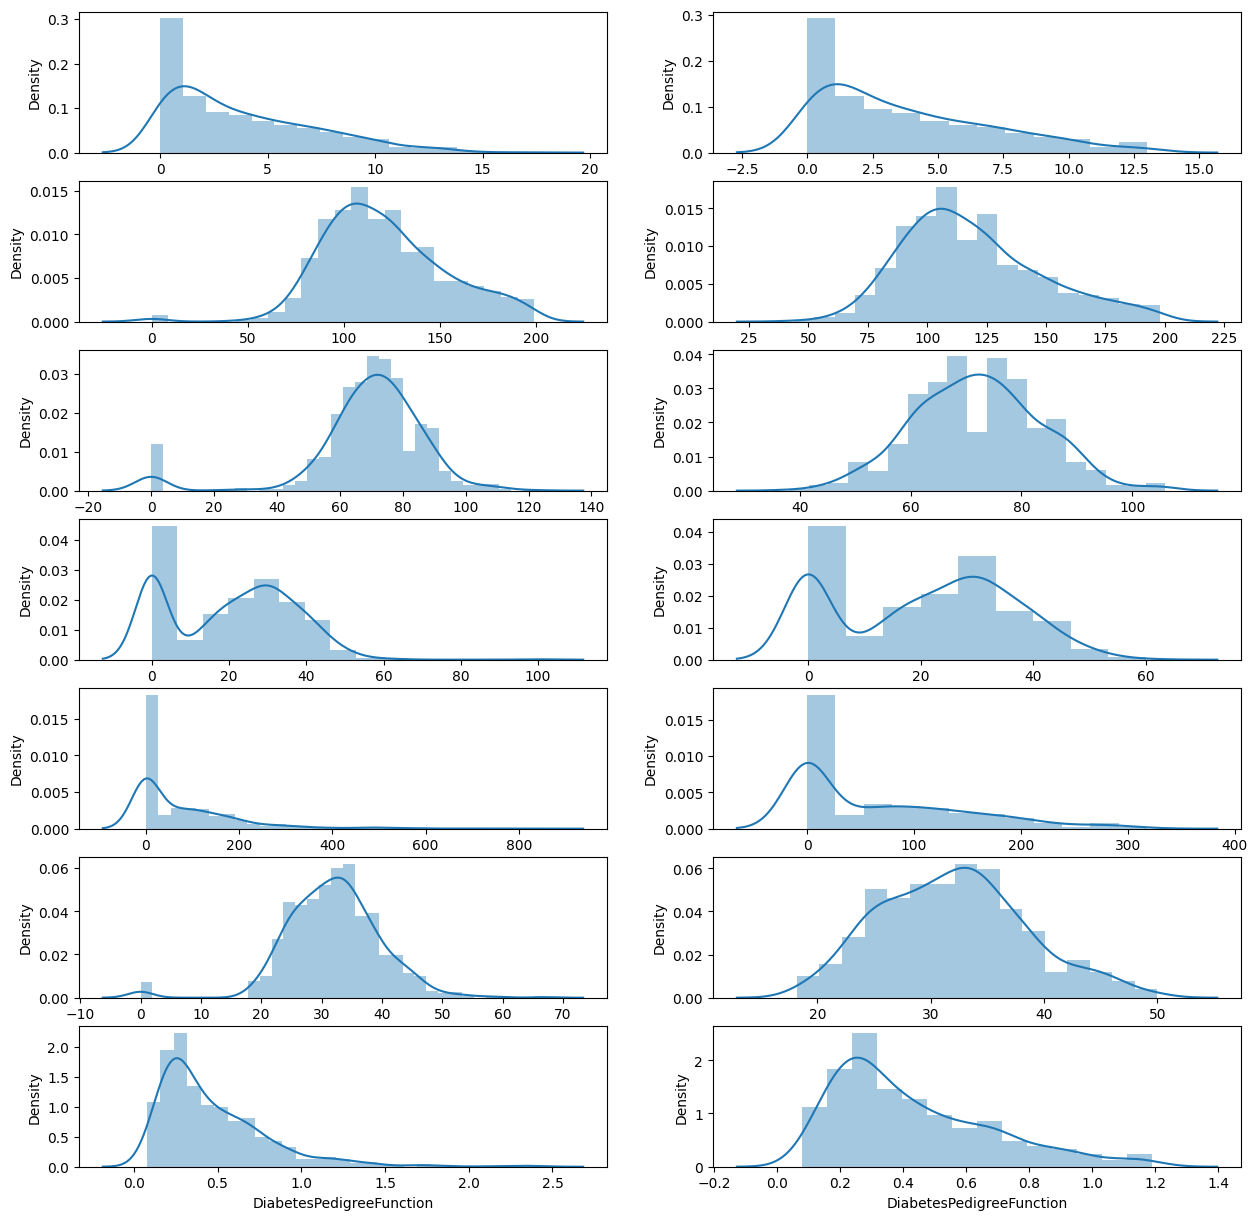

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(7, 2, 1)
sns.distplot(df['Pregnancies'])

plt.subplot(7, 2, 2)
sns.distplot(df_clean['Pregnancies'])


plt.subplot(7, 2, 3)
sns.distplot(df['Glucose'])

plt.subplot(7, 2, 4)
sns.distplot(df_clean['Glucose'])


plt.subplot(7, 2, 5)
sns.distplot(df['BloodPressure'])

plt.subplot(7, 2, 6)
sns.distplot(df_clean['BloodPressure'])


plt.subplot(7, 2, 7)
sns.distplot(df['SkinThickness'])

plt.subplot(7, 2, 8)
sns.distplot(df_clean['SkinThickness'])

plt.subplot(7, 2, 9)
sns.distplot(df['Insulin'])

plt.subplot(7, 2, 10)
sns.distplot(df_clean['Insulin'])

plt.subplot(7, 2, 11)
sns.distplot(df['BMI'])

plt.subplot(7, 2, 12)
sns.distplot(df_clean['BMI'])

plt.subplot(7, 2, 13)
sns.distplot(df['DiabetesPedigreeFunction'])

plt.subplot(7, 2, 14)
sns.distplot(df_clean['DiabetesPedigreeFunction'])
    